In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Force a non-transparent plot gutter
plt.style.use({'figure.facecolor':'white'})

In [10]:
# Load (and cache) standard MNIST dataset.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Extract the pixel counts.
input_shape = x_train.shape[1:]

# Rescale the train and test data.
x_train = x_train / 255.
x_test = x_test / 255.

x_train = tf.expand_dims(x_train, 3)
x_test = tf.expand_dims(x_test, 3)

# Extract the number of classes.
n_classes = len(set(y_train))

# Convert the class numbers to 1-hot categorical values.
y_train = tf.keras.utils.to_categorical(y_train, n_classes)
y_test = tf.keras.utils.to_categorical(y_test, n_classes)

In [11]:
print('s', x_train.shape)
print('q', x_train[0].shape)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(6, kernel_size=5, input_shape=x_train[0].shape, strides=1,  activation='tanh', padding='same'), #C1
  tf.keras.layers.AveragePooling2D(), #S2
  tf.keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
  tf.keras.layers.AveragePooling2D(), #S4
  tf.keras.layers.Flatten(), #Flatten
  tf.keras.layers.Dense(120, activation='tanh'), #C5
  tf.keras.layers.Dense(84, activation='tanh'), #F6
  tf.keras.layers.Dense(10, activation='softmax') #Output layer
])

# Compile using 'Adam'
model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  # Needed for the categorical softmax layer.
  loss=tf.keras.losses.categorical_crossentropy,
  metrics=['accuracy'],
)

s (60000, 28, 28, 1)
q (28, 28, 1)


In [12]:
# Print the model summary.
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_2 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

In [13]:
history = model.fit(
  x=x_train,
  y=y_train,
  batch_size=128,
  epochs=50,
  verbose=1,
  validation_split=0.2,
)

# Evaluate the model with the test data.
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")

Epoch 1/50
375/375 [==============================] - 1s 4ms/step - loss: 0.3754 - accuracy: 0.8925 - val_loss: 0.1728 - val_accuracy: 0.9478

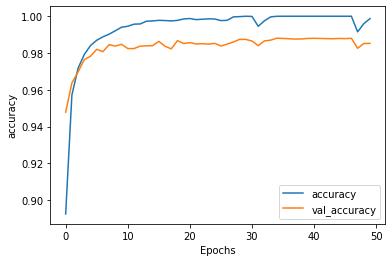

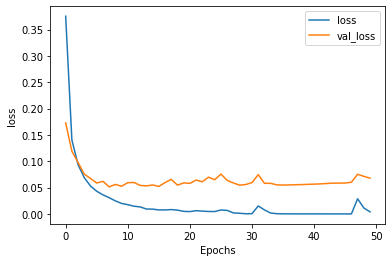

In [14]:

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")